In [1]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Correlations over time

In [3]:
import os
import sys

import pandas as pd
import seaborn as sns

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
%aimport visualization.visualize
from visualization.visualize import biplot, plot_explained_variance, triplot

In [15]:
YEARS = [1976, 1988, 1996, 2004, 2012]

In [41]:
DATA_FRAMES = [pd.read_csv("../data/processed/{year}.csv".format(year=year), index_col=0) for year in YEARS]

In [44]:
def plot_correlation_with_party_over_time(var_name):
    corrs = [df.PartyID.corr(df[var_name], method='spearman') for df in DATA_FRAMES]
    plt.plot(YEARS, corrs)
    plt.title(var_name)
    plt.ylabel("Correlation with Party ID")
    plt.xlabel("Year")

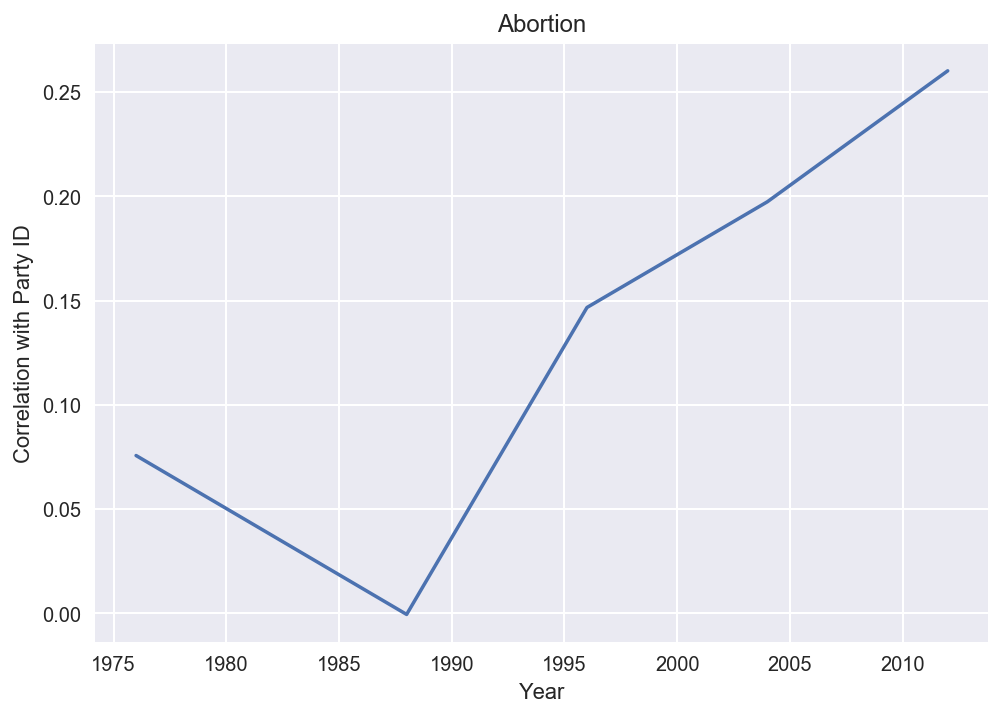

In [45]:
plot_correlation_with_party_over_time('"Abortion"')

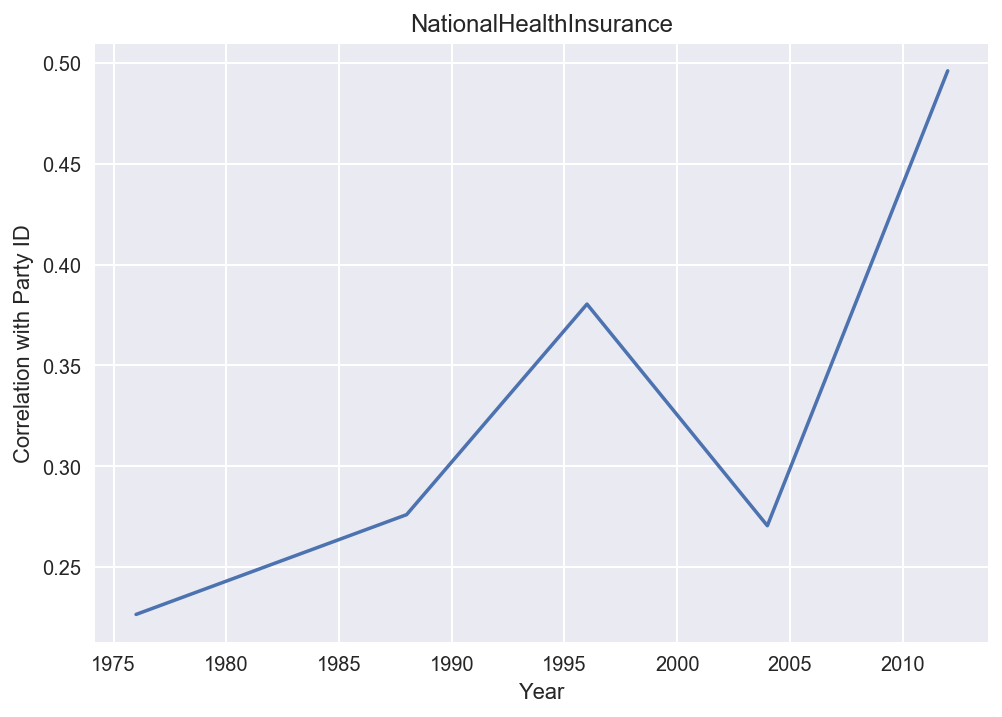

In [46]:
plot_correlation_with_party_over_time("NationalHealthInsurance")

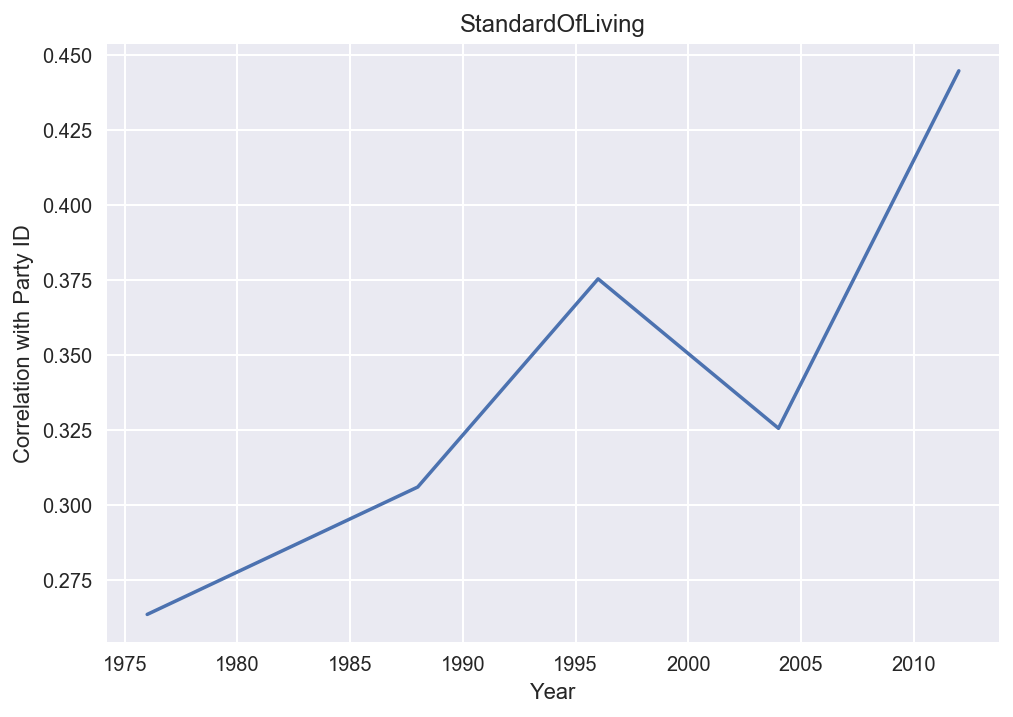

In [47]:
plot_correlation_with_party_over_time("StandardOfLiving")

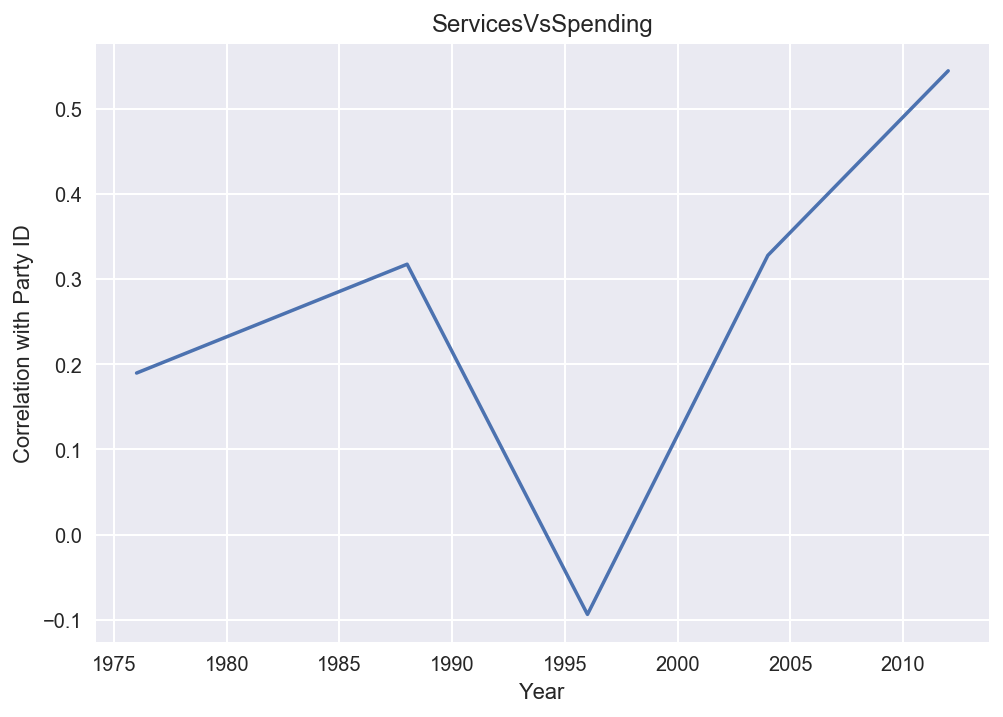

In [48]:
plot_correlation_with_party_over_time("ServicesVsSpending")

Affirmative Action
[0.13618699833353404, 0.23111644888184396, 0.2695177380177603, 0.30828898191716309, 0.38760561506957247]


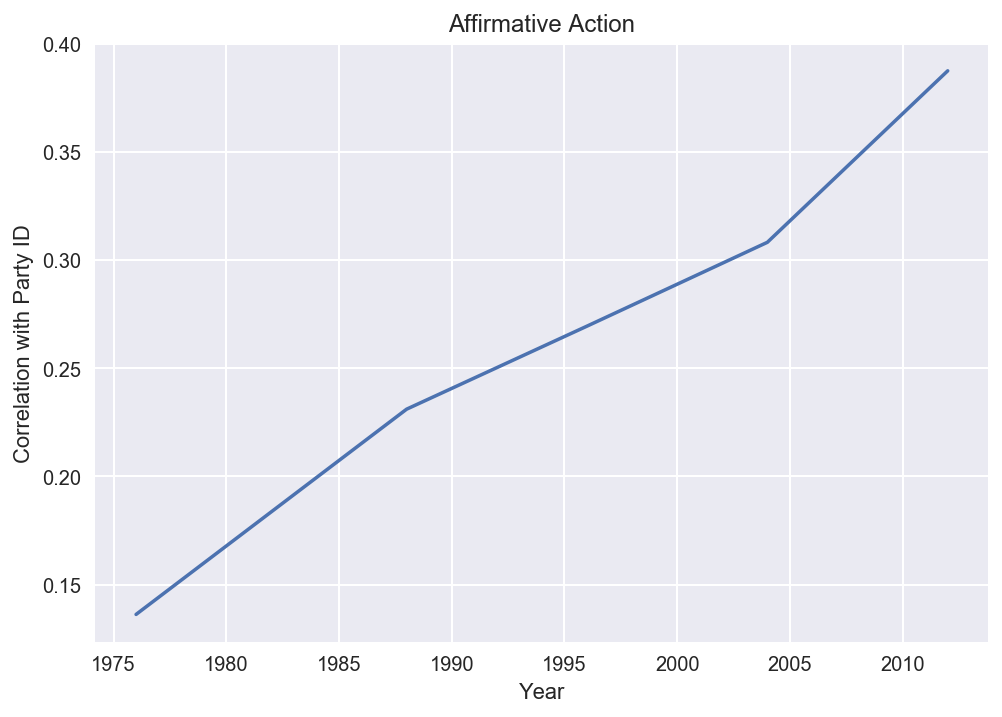

In [40]:
plot_correlation_with_party_over_time("AffirmativeAction")

In [49]:
VARIABLES_CONSISTENT_ACROSS_ALL_YEARS = [
    "PartyID", 
    "Abortion", 
    "NationalHealthInsurance", 
    "StandardOfLiving",
    "ServicesVsSpending",
    "AffirmativeAction",
]

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer, StandardScaler

imp = Imputer(strategy='mean')
scl = StandardScaler()
pca = PCA()
pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
        ('pca', pca),
    ])
scaler_pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
    ])
pipeline.fit(DATA_FRAMES[0][VARIABLES_CONSISTENT_ACROSS_ALL_YEARS])
scaler_pipeline.fit(DATA_FRAMES[0][VARIABLES_CONSISTENT_ACROSS_ALL_YEARS])

Pipeline(steps=[('imp', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scl', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [55]:
pcas = [pipeline.transform(df[VARIABLES_CONSISTENT_ACROSS_ALL_YEARS]) for df in DATA_FRAMES]
scaled = [scaler_pipeline.transform(df[VARIABLES_CONSISTENT_ACROSS_ALL_YEARS]) for df in DATA_FRAMES]
scaled = [pd.DataFrame(arr, columns=VARIABLES_CONSISTENT_ACROSS_ALL_YEARS) for arr in scaled]

In [56]:
for df, year in zip(scaled, YEARS):
    biplot(pca, df, title="{} Survey on {} Axes".format(year, YEARS[0]), color=df.PartyID)